# Logistic Regression

- Commonly used for binary classification
    - Can also be used for multi-modal classification

## Transforming data to be used in a linear process

Categorical -> Probabilities -> Odds -> Logged Odds

In [15]:
import math, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
prob = 0.7

def odds(p, logged=False):
    odd_event  = p/(1-p)
    if logged:
        return np.log(odd_event)
    return odd_event
odds_of_event = odds(prob)
odds_of_event

2.333333333333333

## Logarithms

In [3]:
input_val = 8
base = 2
base ** 3 == input_val

True

In [ ]:

very_large_number = math.factorial(20)
small_number = 14
raw_diff = very_large_number - small_number

np.log(very_large_number) - np.log(small_number)

np.float64(39.69655913113823)

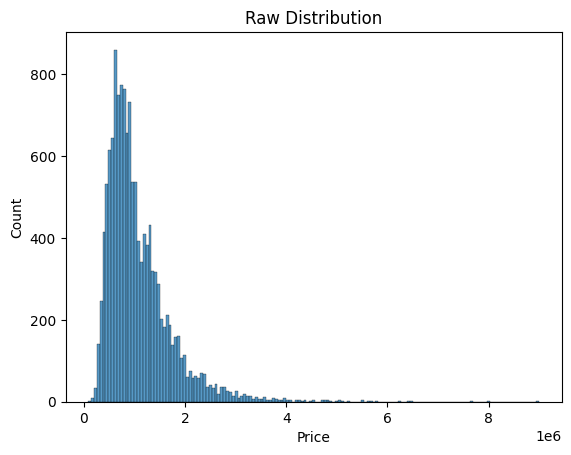

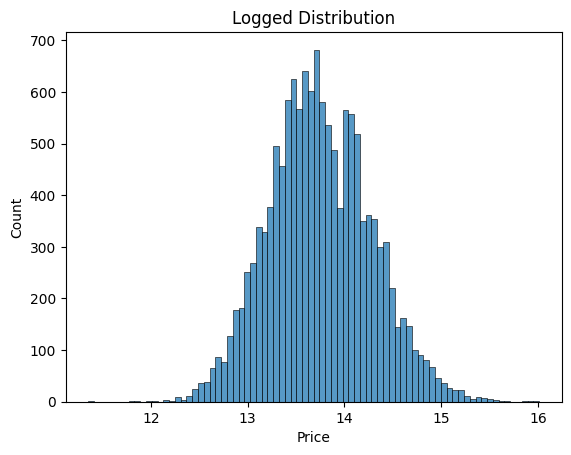

In [13]:
melb = pd.read_csv(r"C:\Users\Xps\Documents\Tutor\Home Work\EDA, Cleaning\melb_data.csv")
sns.histplot(melb['Price'])
plt.title('Raw Distribution')
plt.show()
sns.histplot(np.log(melb['Price']))
plt.title('Logged Distribution')
plt.show()

## Logged odds of the event

In [25]:
probalility = 0.3
odds_of_event = odds(probalility)
odds_of_event
ln_odds = odds(probalility, True)
ln_odds

np.float64(-0.8472978603872036)

### Benefits of using the logged odds
1. if probablity of event is > 0.5 then the logged odds will be a positive number
2. If probablity of event is < 0.5 then the logged odds will be negative number

In [34]:
dummy_data = {'Response': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 
0, 1, 0, 0, 0, 0, 0],
'Input Var': [53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 
72, 73, 75, 75, 76, 76, 78, 79, 81]
}
df = pd.DataFrame(dummy_data)

In [29]:
df['Response'].value_counts()

Response
0    16
1     7
Name: count, dtype: int64

C:\Users\Xps\AppData\Local\Temp\ipykernel_17956\690062760.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=dummy_data, palette='hls')


<Axes: xlabel='Response', ylabel='count'>

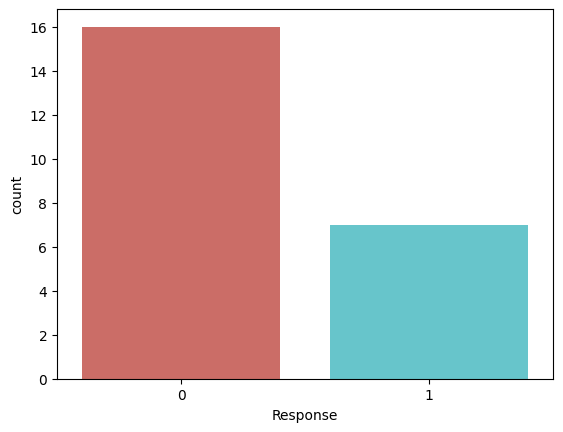

In [31]:
sns.countplot(x='Response', data=dummy_data, palette='hls')

In [36]:
import statsmodels.api as sm
X = df['Input Var']
y = df['Response']
X_constant = sm.add_constant(X)
X_constant

,const,Input Var
0,1.0,53
1,1.0,57
2,1.0,58
3,1.0,63
4,1.0,66
5,1.0,67
6,1.0,67
7,1.0,67
8,1.0,68
9,1.0,69


In [38]:
model = sm.Logit(y, X_constant)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                  0.2813
Time:                        20:11:03   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0429      7.379      2.039      0.041       0.581      29.505
Input Var     -0.2322      0.

## Interpreting the model

predicted_logit = 15.0429 + coeffs * X == 15.0429 - 0.2322 * X

In [54]:
x_input = 52
predicted_logit = 15.0429 -(0.2322 * x_input)
print(predicted_logit)
def model_logits(x_value):
    return 15.0429 -(0.2322 * x_value)
def return_odds(logit):
    return np.exp(logit)
print(return_odds(predicted_logit))

2.9685000000000006
19.462703634086534


In [55]:
logged_odds = list(map(model_logits, X))
logged_odds

[2.7363,
 1.8074999999999992,
 1.5753000000000004,
 0.4143000000000008,
 -0.28229999999999933,
 -0.5145,
 -0.5145,
 -0.5145,
 -0.7467000000000006,
 -0.9788999999999994,
 -1.2110999999999983,
 -1.2110999999999983,
 -1.2110999999999983,
 -1.2110999999999983,
 -1.6754999999999995,
 -1.9076999999999984,
 -2.3720999999999997,
 -2.3720999999999997,
 -2.6042999999999985,
 -2.6042999999999985,
 -3.0686999999999998,
 -3.3008999999999986,
 -3.7653]

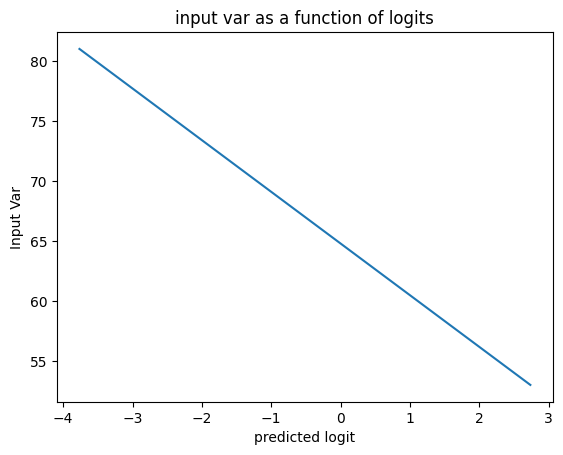

In [59]:
plt.plot(logged_odds, X)
plt.xlabel('predicted logit')
plt.ylabel('Input Var')
plt.title('input var as a function of logits')
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

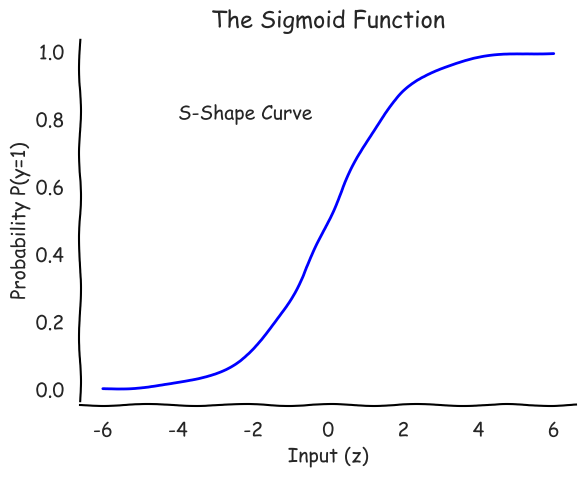

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Use the context manager to apply the style only to this plot
with plt.xkcd():
    fig, ax = plt.subplots()

    # Data for a logistic sigmoid curve
    x = np.linspace(-6, 6, 100)
    y = 1 / (1 + np.exp(-x))

    ax.plot(x, y, color='b', lw=2)

    # Annotations (the "hand-written" part)
    ax.set_title('The Sigmoid Function')
    ax.set_xlabel('Input (z)')
    ax.set_ylabel('Probability P(y=1)')

    # Pointing to specific features
    ax.annotate('S-Shape Curve',
                xy=(0, 0.5),
                xytext=(-4, 0.8),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

    # Remove top and right spines for a cleaner look
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    plt.show()

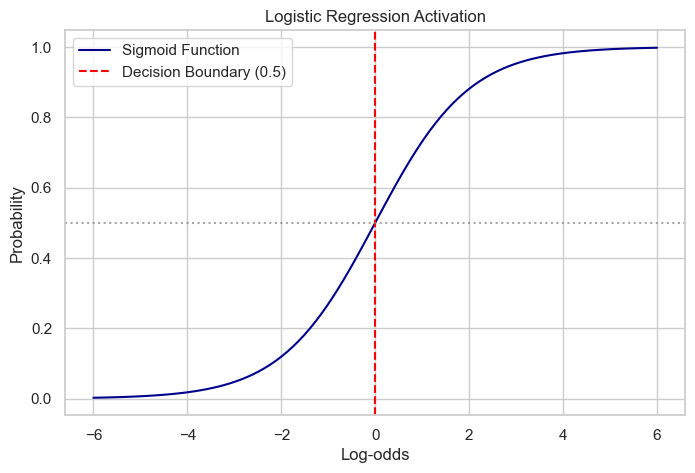

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set a clean theme
sns.set_theme(style="whitegrid")

x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Sigmoid Function', color='darkblue')

# Adding a decision boundary line
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7)

plt.title('Logistic Regression Activation')
plt.xlabel('Log-odds')
plt.ylabel('Probability')
plt.legend()
plt.show()

graph LR
    A[Input X] --> B(Weights & Bias)
    B --> C{Activation Function}
    C -->|Sigmoid| D[Output Probability]
    C -->|Relu| E[Hidden Layer Output]